## Libraries

In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.colors as mcolors

# Metrics, normalization and clustering package
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

## Exploratory Data Analysis

In [2]:
# Ckecking missing value formats and read data
missing_value_formats=["na", "n.a.", "?", "NA", "n/a", "--"]
artists=pd.read_csv("data_by_genres.csv", na_values=missing_value_formats)

# Checking missing values
if artists.isna().sum().sum()==0:
    print("No missing values.")
else:
    print("There are missing values in the data.")

# Display first and last 5 records
display(artists.head())
display(artists.tail())

# Display shape
print("Shape of teh dataset: ", artists.shape)
print("\nInformation about the dataset:\n")

# Returns the info
artists.info()

No missing values.


,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
2968,1,zolo,0.222625,0.547082,258099.064530,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,206320.000000,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,306072.777778,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,198417.333333,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7
2972,1,zydeco,0.421038,0.629409,171671.690476,0.609369,0.019248,0.255877,-9.854825,0.050491,126.366087,0.808544,30.261905,7


Shape of teh dataset:  (2973, 14)

Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [3]:
initial_count=len(artists)
artists.drop_duplicates(inplace=True)
removed_count=initial_count-len(artists)
print(f"Number of duplicates removed: {removed_count}")

Number of duplicates removed: 0


In [4]:
artists.drop(columns=["genres", "mode", "key"], inplace=True)
artists.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333
1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000
2,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000
3,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882
4,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071


### Normalizing dataset values
It is important to normalize them, as each one is within a different range.

In [5]:
values=Normalizer().fit_transform(artists.values)
values

array([[6.10946629e-06, 1.01613026e-06, 9.99999855e-01, ...,
        4.69978701e-04, 6.47441229e-07, 1.73635274e-04],
       [4.71718916e-07, 2.85381777e-07, 9.99999992e-01, ...,
        1.14679301e-04, 2.11414507e-07, 5.00530399e-05],
       [6.61589918e-06, 6.18178506e-06, 9.99999239e-01, ...,
        1.15859849e-03, 8.46522533e-06, 4.16749555e-04],
       ...,
       [8.60125801e-07, 2.44676722e-06, 9.99999932e-01, ...,
        3.33140425e-04, 2.69253300e-06, 1.52469174e-04],
       [5.00460255e-06, 3.55647654e-06, 9.99999892e-01, ...,
        4.60030324e-04, 3.72447260e-06, 0.00000000e+00],
       [2.45257893e-06, 3.66635027e-06, 9.99999712e-01, ...,
        7.36091376e-04, 4.70982382e-06, 1.76277731e-04]])

### Clustering Algorithm (kmeans)

In [6]:
SEED=42

This code defines a function called clustering that takes two parameters: n_clusters (number of clusters) and dataset (input data for clustering). Inside the function, it performs K-means clustering using KMeans from scikit-learn library. It calculates the silhouette score, Davies Bouldin score, and Calinski Harabasz score using metrics from scikit-learn. Finally, it prints the scores using the print statement.

In [7]:
def clustering(n_clusters, dataset):
    
    # KMeans
    kmeans=KMeans(n_clusters, n_init=10, max_iter=300, random_state=SEED)
    labels=kmeans.fit_predict(dataset)
    
    # Silhouette
    silhouette=metrics.silhouette_score(dataset, labels, metric='euclidean')
    
    # Davies Bouldin Score
    dbs=metrics.davies_bouldin_score(dataset, labels)
    
    # Calinski Harabasz Score
    calinski=metrics.calinski_harabasz_score(dataset, labels)
    
    print(f"Silhouette: {silhouette} | Daniel Bouldin: {dbs} | Calinski Harabasz: {calinski}")

In [8]:
for i in range(3, 11):
    print(f"Number of clustering = {i}")
    clustering(i, values)
    print("="*30)

Number of clustering = 3
Silhouette: 0.3909683960283946 | Daniel Bouldin: 0.8605067650863377 | Calinski Harabasz: 1789.6995447109405
Number of clustering = 4
Silhouette: 0.3898950278667684 | Daniel Bouldin: 0.751752353789721 | Calinski Harabasz: 2057.0870986463215
Number of clustering = 5
Silhouette: 0.3419568740753622 | Daniel Bouldin: 0.8586923816041467 | Calinski Harabasz: 2115.788702740171
Number of clustering = 6
Silhouette: 0.3651537860326292 | Daniel Bouldin: 0.7939093312086767 | Calinski Harabasz: 2136.6454466689725
Number of clustering = 7
Silhouette: 0.3403561498908339 | Daniel Bouldin: 0.8197266473148436 | Calinski Harabasz: 2089.9510033417214
Number of clustering = 8
Silhouette: 0.3111967246510519 | Daniel Bouldin: 0.8797224789856105 | Calinski Harabasz: 2035.5530600128482
Number of clustering = 9
Silhouette: 0.31883050596115353 | Daniel Bouldin: 0.8876261359163214 | Calinski Harabasz: 1967.5250661776913
Number of clustering = 10
Silhouette: 0.3153059322278022 | Daniel Boul

### Based on the above data, we chose 6 as the number of clusters to be created and analyzed
- __Silhoutte Score__: The Silhouette score measures the compactness and separation of clusters, ranging between -1 and 1. A value closer to 1 indicates tha tthe clusters are well-separated and compact, with data points within each cluster being more similar to each other than to data points in other clusters. A positive Silhouette score generally indicates good cluster creation. Among the provided results, the clustering with 6 clusters has a Silhouette score of 0.365, suggesting relatively well-separated clusters.

- __Davies Bouldin Score__: The Davies Bouldin score assesses the quality of clustering results, with values ranging from 0 to infinity. A lower value indicates better clustering, with well-separated and distinct clusters. The clustering with 6 clusters has a Davies Bouldin score of 0.794, indicating reasonably well-defined clusters.

- __Calinski Harabasz Score__: The Calinski Harabasz score measures the ratio of between-cluster variance to within-cluset variance. A higher score is indicative of better clustering, with well-separated and distinct clusters. Among the provided results, the clustering with 6 clusters has a Calinski Harabasz score of 2136.645, suggesting good separation and high inter-cluster variance.

Based on these metrics, the clustering with 6 clusters appears to be a promising choice, as it shows relatively high Silhouette score, reasonably low Davies Bouldin score, and a high Calinski Harabasz score. However, it's importatn to note that the selection of the "best" number of clusters ultimately depends on the specific context, domain knowledge, and the goals of the analysis.

In [9]:
n_clusters=6

#### Creating cluster labels
As we have 6 clusters, the labels will be numbered from 0 to 6.

In [10]:
kmeans=KMeans(n_clusters, n_init=10, max_iter=300, random_state=SEED)
y_pred=kmeans.fit_predict(values)
labels=kmeans.labels_
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5]),
 array([ 306,  698,    4,  143,  647, 1175], dtype=int64))

In [11]:
artists["cluster"]=labels
artists.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,cluster
0,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,5
1,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,4
2,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,3
3,0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,5
4,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,1


In [12]:
# Original column names
original_columns=['acousticness', 'danceability', 'duration_ms', 'energy',
                  'instrumentalness', 'liveness', 'loudness', 'speechiness', 
                  'tempo', 'valance', 'popularity', 'cluster']

# New column names
new_columns=['Acousticness', 'Danceability', 'Duration (ms)', 'Energy',
             'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness',
             'Tempo', 'Valence', 'Popularity', 'Cluster']

# Rename columns
artists.columns=new_columns

### Extracting information from clusters (Visualization)

In [13]:
def scatter(dataset, x, y, xlabel, ylabel, title):
    sns.lmplot(data=dataset, x=x, y=y, hue='Cluster', height=5, 
               aspect=1.6, fit_reg=False, legend=True, legend_out=True,
               scatter_kws={"s":10})
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    plt.title(title, fontsize=20)
    
    plt.show()

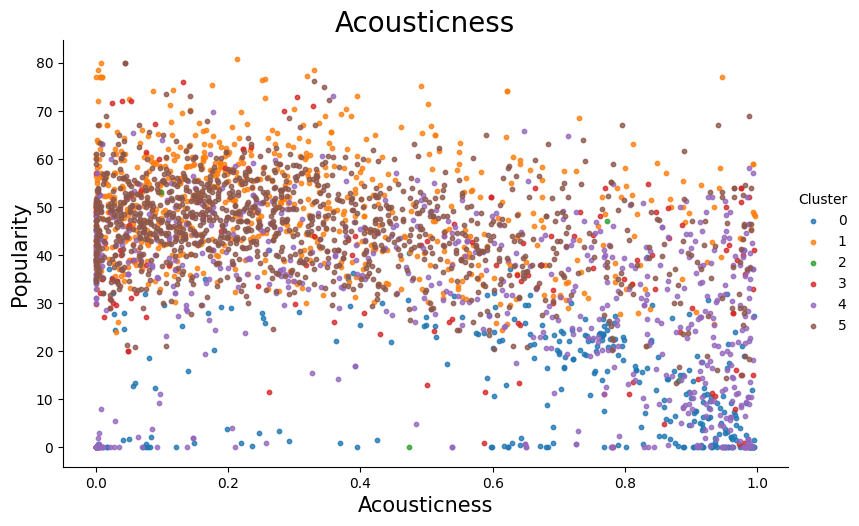

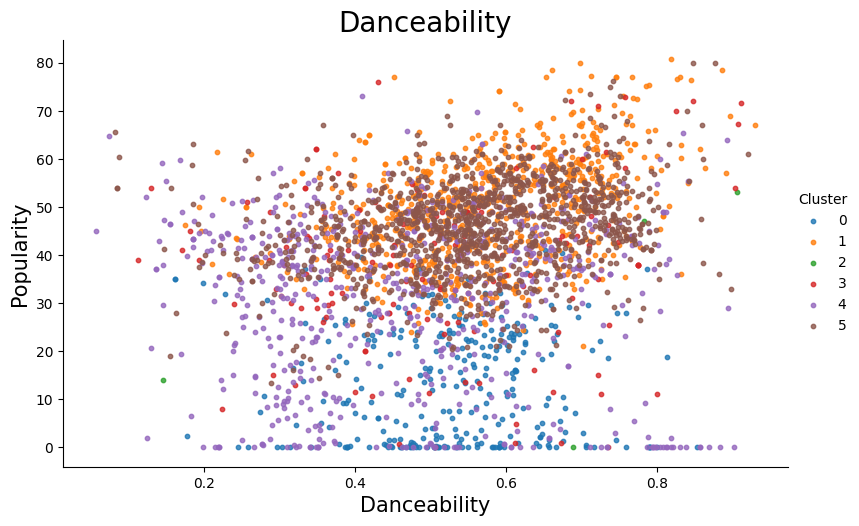

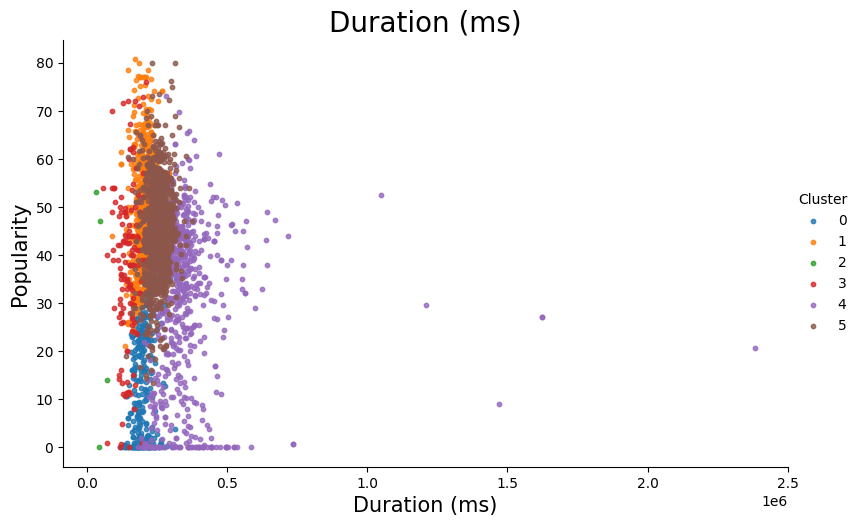

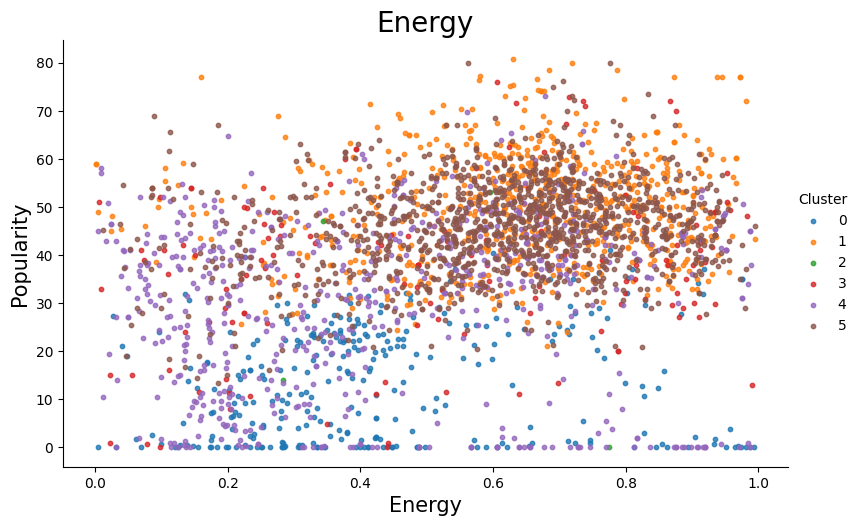

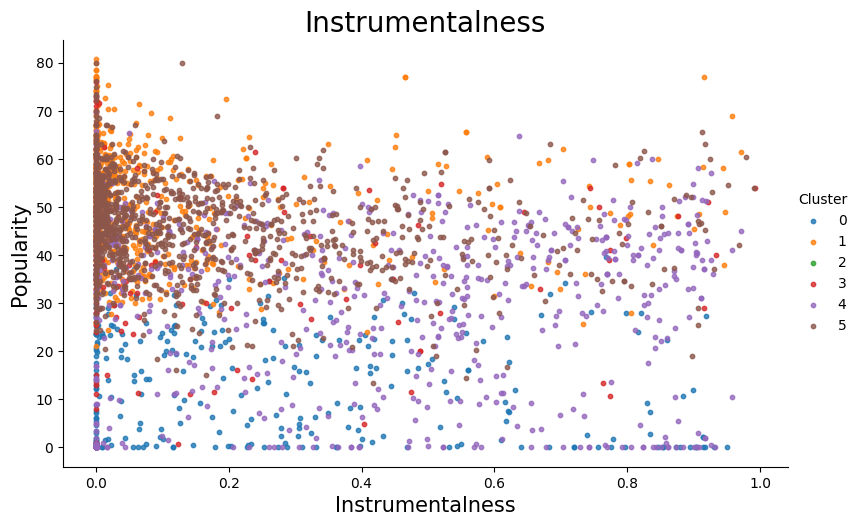

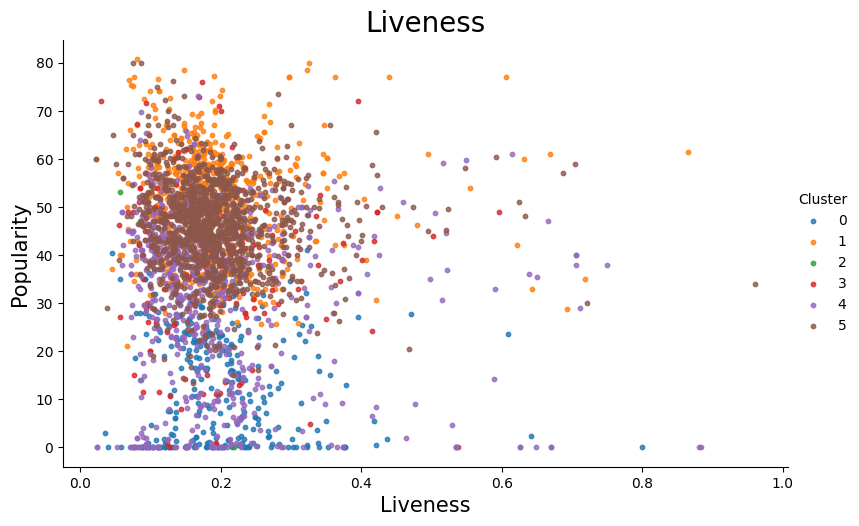

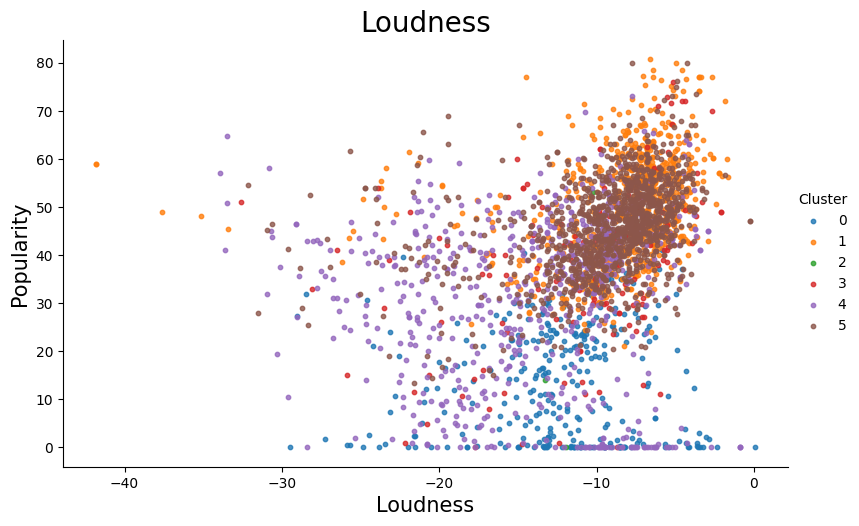

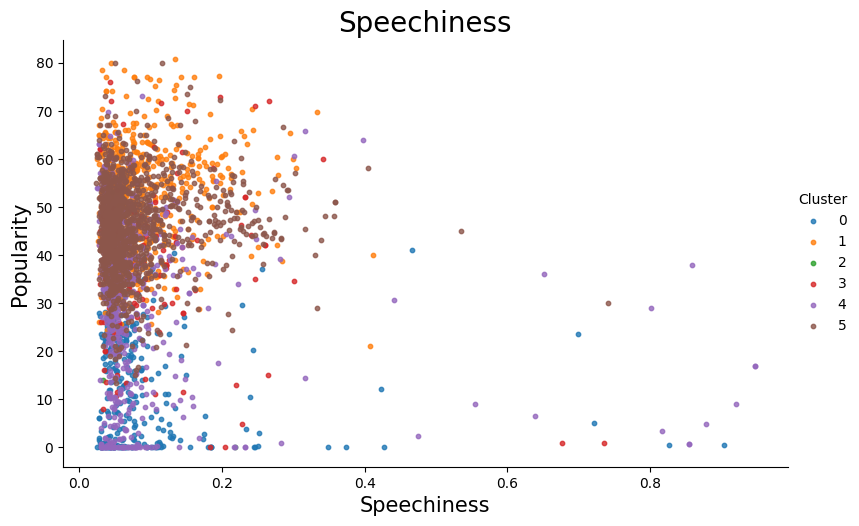

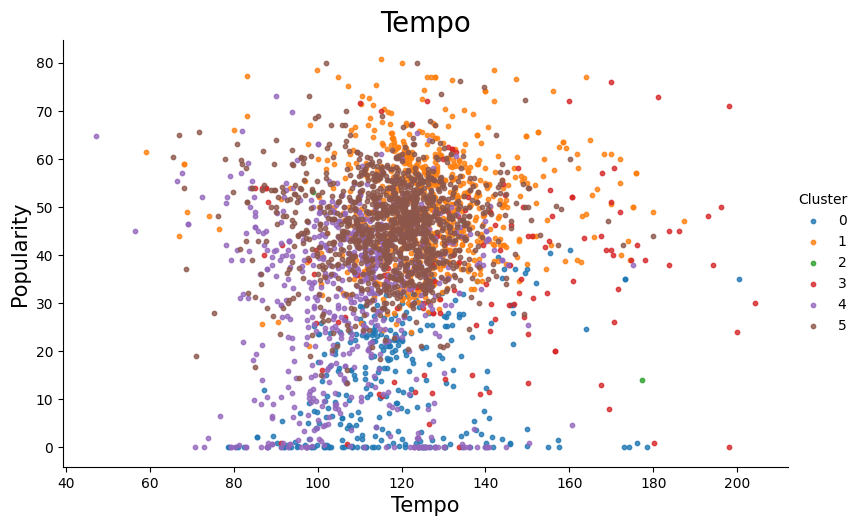

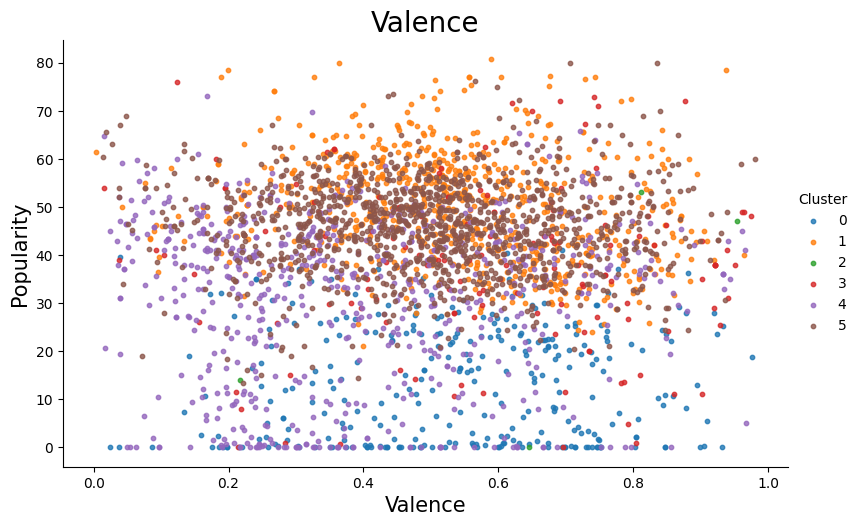

In [14]:
for column in artists.columns:
    if column != 'Cluster' and column != 'Popularity':
        scatter(artists, column, "Popularity", column, "Popularity", column)

Visually, we can gather some information, but it doesn't seen to be the ideal method. Therefore, let's analyze the descriptive statistics of each cluster.

In [15]:
centroids=kmeans.cluster_centers_
centroids

array([[ 3.60015404e-06,  2.73045990e-06,  9.99999810e-01,
         2.17210225e-06,  1.36693555e-06,  1.05861279e-06,
        -6.48527152e-05,  4.61190505e-07,  6.01415923e-04,
         2.81579738e-06,  6.72405773e-05],
       [ 1.53845023e-06,  2.85153453e-06,  9.99999772e-01,
         3.12715240e-06,  5.78279074e-07,  9.49900092e-07,
        -4.29810360e-05,  4.21348848e-07,  6.20015753e-04,
         2.66427540e-06,  2.46986103e-04],
       [ 1.09589922e-05,  1.62004263e-05,  9.99995126e-01,
         1.22474210e-05,  4.83885116e-10,  2.50793092e-06,
        -2.41018708e-04,  2.09548423e-06,  2.93258459e-03,
         1.63817178e-05,  7.38531367e-04],
       [ 3.65067230e-06,  3.71790345e-06,  9.99999476e-01,
         3.64798113e-06,  1.36856454e-06,  1.36505481e-06,
        -8.30522432e-05,  7.54932548e-07,  9.59056208e-04,
         4.10905671e-06,  2.69470997e-04],
       [ 1.64976759e-06,  1.42144215e-06,  9.99999937e-01,
         1.34239328e-06,  1.20978844e-06,  5.84122444e-07,
  

In [16]:
max=len(centroids[0])

for i in range(max):
    print(f"Column: {artists.columns.values[i]} - Variance: {centroids[:,i].var()}")

Column: Acousticness - Variance: 1.1209524082504116e-11
Column: Danceability - Variance: 2.617989219668243e-11
Column: Duration (ms) - Variance: 3.020231369890822e-12
Column: Energy - Variance: 1.3589471103143727e-11
Column: Instrumentalness - Variance: 2.5139015492331816e-13
Column: Liveness - Variance: 3.966058282897795e-13
Column: Loudness - Variance: 5.083879086670871e-09
Column: Speechiness - Variance: 4.054661864835214e-13
Column: Tempo - Variance: 7.949682854837902e-07
Column: Valence - Variance: 2.7284869026413513e-11
Column: Popularity - Variance: 4.995741585751636e-08


We then chosse the columns with the highest variance.<br><br>
1. Popularity - Variance: 4.995741585751636e-08
2. Danceability - Variance: 2.617989219668243e-11
3. Valence - Variance: 2.7284869026413513e-11
4. Energy - Variance: 1.3589471103143727e-11
5. Acousticness - Variance: 1.1209524082504116e-11
6. Duration (ms) - Variance: 3.020231369890822e-12
7. Loudness - Variance: 5.083879086670871e-09
8. Tempo - Variance: 7.949682854837902e-07
9. Instrumentalness - Variance: 2.5139015492331816e-13
10. Liveness - Variance: 3.966058282897795e-13
11. Speechiness - Variance: 4.054661864835214e-13

In [17]:
description=artists.groupby("Cluster")[["Acousticness", "Danceability", "Energy", "Duration (ms)", "Valence", "Popularity"]]
size=description.size()
description=description.mean()
description["size"]=size
description

,Acousticness,Danceability,Energy,Duration (ms),Valence,Popularity,size
Cluster,,,,,,,
0,0.676522,0.527706,0.434444,199119.228469,0.541591,13.600343,306
1,0.295577,0.574718,0.641494,205316.286928,0.536139,50.178276,698
2,0.556700,0.630750,0.499500,47445.500000,0.656750,28.500000,4
3,0.476671,0.515082,0.533951,147706.632087,0.578156,37.982639,143
4,0.526856,0.468829,0.447722,353298.184324,0.389459,30.922499,647
5,0.313442,0.557374,0.612379,250407.738627,0.500173,45.907422,1175


#### Data dictionary

1. Acousticness: A measure of the acoustic presence in a song, ranging from 0 (least acoustic) to 1 (most acoustic).
2. Danceability: Represents the suitability of a song for dancing, ranging from 0 (least danceable) to 1 (most danceable).
3. Duration (ms): The duration of a song in milliseconds, indicating the length of the song.
4. Energy: Refers to the intensity and activity level of a song, ranging from 0 (low energy) to 1 (high energy).
5. Instrumentalness: Measures the likelihood of a song being instrumental, ranging from 0 (vocal) to 1 (instrumental).
6. Liveness: Represents the probability of a song being performed live, ranging from 0 (studio recording) to 1 (live performance).
7. Loudness: Represents the overall loudness of a song in decibels (dB), ranging from negative values (quieter) to positive values (louder).
8. Speechiness: Measures the presence of spoken words in a song, ranging from 0 (music only) to 1 (spoken word only).
9. Tempo: The tempo of a song in beats per minute (BPM), indicating the speed or pace of the song.
10. Valence: Reflects the musical positiveness conveyed by a song, ranging from 0 (negative) to 1 (positive).
11. Popularity: Represents the popularity or fame of a song, ranging from 0 (least popular) to 100 (most popular).


### Cluster Summary:
#### Cluster 0:
- Artists whose songs have low acousticness.
- Artists whose songs have high danceability.
- Songs with high energy.
- Songs with medium duration.
- Songs with slightly positive valence.
- Songs with high popularity.
- Cluster with a moderate size.
#### Cluster 1:
- Artists whose songs have low acousticness.
- Artists whose songs have high danceability.
- Songs with high energy.
- Songs with medium duration.
- Songs with slightly positive valence.
- Songs with high popularity.
- Cluster with a moderate size.
#### Cluster 2:
- Artists whose songs have moderate acousticness.
- Artists whose songs have high danceability.
- Songs with moderate energy.
- Songs with very short duration.
- Songs with high valence.
- Less popular artists.
- Smallest cluster size.
#### Cluster 3:
- Artists whose songs have high acousticness.
- Artists whose songs have high danceability.
- Songs with moderate energy.
- Songs with longer duration.
- Songs with higher valence.
#### Cluster 4:
- Artists whose songs have high acousticness.
- Artists whose songs have lower danceability (with a small difference).
- Songs with lower energy.
- Songs with longer duration.
- Less popular artists.
- Small cluster size.
#### Cluster 5:
- Artists whose songs have low acousticness.
- Artists whose songs have reasonable danceability.
- Songs with moderate energy.
- Songs with medium duration.
- Songs with neutral valence.
- Moderate popularity.
- Large cluster size.

These cluseter summaries provide an overview of the characteristics for each cluster based on the attributes: axousticness, danceability, energy, duration, calence, popularity, and size.

## Conclusion
In this project, we effectively utilized K-means clustering on the Spotify Songs Dataset to categorize songs by genre. After assessing various cluster setups, we opted for 6 clusters as a promising option. The clustering examination unveiled distinct clusters with a Silhouette score of 0.365, indicating their separateness. Furthermore, a Davies Bouldin score of 0.794 suggested well-defined clusters, while a Calinski Harabasz score of 2136.627 indicated strong separation and significant inter-cluster variance.<br><br>
Through visual examination of the clusters and appropriate variable labeling, we gained valuable insights into the attributes of songs within each cluster. This analysis offers crucial insights for music recommendation systems and genre classification tasks.<br><br>
It's important to note that further enhancements and explorations can be pursued to refine the clustering outcomes. Implementation of alternative clustering techniques or adjustments in cluster sizes can be explored based on specific research interests and objectives. Such refinements could result in improved genre representation and more precise analysis.